In [1]:
import pandas as pd
import numpy as np

In [102]:
zom_org=pd.read_csv('zomato.csv')

In [103]:
zom_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [104]:
zom_org.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [185]:
zom_org.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [187]:
zom=zom_org.copy()

In [188]:
zom.drop(columns=['url','address','name','phone','dish_liked','reviews_list','listed_in(type)','listed_in(city)'], inplace=True)
zom.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[]
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[]
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[]
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[]
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[]


In [189]:
zom.rename(columns={'approx_cost(for two people)':'cost'},inplace=True)
zom.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[]
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[]
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[]
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[]
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[]


In [190]:
### checking NaN
for col in zom.columns:
    print(f'No. of NaN in {col}: ',sum(zom[col].isna()))

No. of NaN in online_order:  0
No. of NaN in book_table:  0
No. of NaN in rate:  7775
No. of NaN in votes:  0
No. of NaN in location:  21
No. of NaN in rest_type:  227
No. of NaN in cuisines:  45
No. of NaN in cost:  346
No. of NaN in menu_item:  0


In [191]:
### checking '-'
for col in zom.columns:
    print(f"No. of '-'' in {col}: ",sum((zom[col]=='-')))

No. of '-'' in online_order:  0
No. of '-'' in book_table:  0
No. of '-'' in rate:  69
No. of '-'' in votes:  0
No. of '-'' in location:  0
No. of '-'' in rest_type:  0
No. of '-'' in cuisines:  0
No. of '-'' in cost:  0
No. of '-'' in menu_item:  0


### handling NaN and empty string

In [192]:
zom.dropna(inplace=True)
zom.reset_index(inplace=True,drop=True)

In [193]:
### drop entries where rate is 'NEW' or '-'

index=zom[(zom['rate']=='NEW') | (zom['rate']=='-')].index
index
zom.drop(index=index,inplace=True)
zom.reset_index(inplace=True,drop=True)

In [194]:
### removing '/5' and convert into float

lst=[rate for rate in map(lambda x: float(x[:-2]), zom['rate'][:])]
zom['rate'][:]=lst

<ipython-input-194-72f1d834f69a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zom['rate'][:]=lst


In [195]:
zom

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[]
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[]
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[]
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[]
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[]
...,...,...,...,...,...,...,...,...,...
41258,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,[]
41259,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,[]
41260,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",[]
41261,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",[]


In [196]:
### checking if online_order contain values other than Yes on No 
print('No other values') if zom['online_order'].unique().size==2 else print('there are other values')

No other values


In [197]:
### checking if book_table contain values other than Yes on No 
print('No other values') if zom['book_table'].unique().size==2 else print('there are other values')

No other values


In [198]:
print('No. of citys: ',zom['location'].unique().size)

No. of citys:  92


In [199]:
### converting cost into int type

## first remove ',' in numbers e.g '1,200'
zom['cost']=[val for val in map(lambda x: x.replace(',',''),zom['cost'])]

zom['cost']=[val for val in map(int,zom['cost'])]
zom

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[]
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[]
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[]
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[]
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[]
...,...,...,...,...,...,...,...,...,...
41258,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,[]
41259,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,[]
41260,No,No,3.6,27,Whitefield,Bar,Continental,1500,[]
41261,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,[]


In [207]:
print('No. unique menu items ',zom['menu_item'].unique().size)
zom['menu_item'].value_counts()[:3]

No. unique menu items  8243


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

## making dataset trainable 

In [208]:
### converting attribute into thier label encoding and create mapper to reacces their category from the encoding

mapper=dict()
for col in zom.columns:
    if col not in ['rate','votes','cost']:
        encoded_output, Mapper=zom[col].factorize(sort=True)
        zom[col]=encoded_output
        mapper[col]=Mapper.to_list()
        #print(ecoded_output, mapper)
        
mapper

{'online_order': ['No', 'Yes'],
 'book_table': ['No', 'Yes'],
 'location': ['BTM',
  'Banashankari',
  'Banaswadi',
  'Bannerghatta Road',
  'Basavanagudi',
  'Basaveshwara Nagar',
  'Bellandur',
  'Bommanahalli',
  'Brigade Road',
  'Brookefield',
  'CV Raman Nagar',
  'Central Bangalore',
  'Church Street',
  'City Market',
  'Commercial Street',
  'Cunningham Road',
  'Domlur',
  'East Bangalore',
  'Ejipura',
  'Electronic City',
  'Frazer Town',
  'HBR Layout',
  'HSR',
  'Hebbal',
  'Hennur',
  'Hosur Road',
  'ITPL Main Road, Whitefield',
  'Indiranagar',
  'Infantry Road',
  'JP Nagar',
  'Jalahalli',
  'Jayanagar',
  'Jeevan Bhima Nagar',
  'KR Puram',
  'Kaggadasapura',
  'Kalyan Nagar',
  'Kammanahalli',
  'Kanakapura Road',
  'Kengeri',
  'Koramangala',
  'Koramangala 1st Block',
  'Koramangala 2nd Block',
  'Koramangala 3rd Block',
  'Koramangala 4th Block',
  'Koramangala 5th Block',
  'Koramangala 6th Block',
  'Koramangala 7th Block',
  'Koramangala 8th Block',
  'Kumar

In [212]:
mapper['menu_item'][-1]

'[]'

In [122]:
zom

,online_order,book_table,rate,votes,rest_type,cost,type,city
0,1,1,4.1,775,24,800,0,1
1,1,0,4.1,787,24,800,0,1
2,1,0,3.8,918,19,800,0,1
3,0,0,3.7,88,73,300,0,1
4,0,0,3.8,166,24,600,0,1
...,...,...,...,...,...,...,...,...
41266,0,0,3.7,34,25,800,6,29
41267,0,0,2.5,81,25,800,6,29
41268,0,0,3.6,27,6,1500,6,29
41269,0,1,4.3,236,6,2500,6,29


In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [214]:
x=zom.loc[:,zom.columns!='rate']
y=zom['rate']

In [215]:
x.shape,y.shape

((41263, 8), (41263,))

In [312]:
x_tr,x_t,y_tr,y_t=train_test_split(x.to_numpy(dtype=float),y.to_numpy(dtype=float),test_size=0.1,random_state=42,stratify=y,)


In [299]:
def standard_scaler(x):
    scaler=StandardScaler()
    scaler.fit(x,)
    return scaler.transform(x)


In [303]:
def standard_scalar(x:np.array):
    return (x-x.mean(axis=0))/x.std(axis=0)

In [313]:
x_tr[:,2:]=standard_scaler(x_tr[:,2:])
x_t[:,2:]=standard_scaler(x_t[:,2:])

In [314]:
x_tr[:5]

array([[ 1.        ,  0.        , -0.07020508, -0.63561465, -0.8167554 ,
         0.65762835, -0.11829906,  0.49859221],
       [ 1.        ,  0.        ,  0.61064076,  0.23505187, -1.12377332,
        -0.9795601 ,  0.41628887,  0.19319079],
       [ 1.        ,  0.        , -0.24154376, -0.18135386, -0.8167554 ,
         0.82328734, -0.11829906,  0.49859221],
       [ 1.        ,  0.        , -0.27536061, -1.35486091, -0.8167554 ,
         0.66509047,  0.41628887,  0.49859221],
       [ 0.        ,  1.        , -0.31030468,  1.97638491,  0.02754385,
        -0.46467403,  5.12066258,  0.49859221]])

## model creation and training

In [218]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [317]:
layers=[
        Dense(1024,activation='relu',input_shape=(8,)),
        Dropout(.2),
        Dense(512,activation='relu',input_shape=(8,)),
        Dropout(.2),
        Dense(128,activation='relu',input_shape=(8,)),
        Dropout(.2),
        Dense(1)
        ]
model2=Sequential(layers)

In [318]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1024)              9216      
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                

In [319]:
model2.compile(optimizer='Adam',loss='mse')

In [324]:
history2=model2.fit(x_tr,y_tr,batch_size=32,epochs=20,validation_data=(x_t,y_t))

Epoch 1/10
1161/1161 [==============================] - 158s 136ms/step - loss: 0.1204 - val_loss: 0.0986
Epoch 2/10
1161/1161 [==============================] - 149s 128ms/step - loss: 0.1163 - val_loss: 0.0972
Epoch 3/10
1161/1161 [==============================] - 142s 123ms/step - loss: 0.1128 - val_loss: 0.1023
Epoch 4/10
1161/1161 [==============================] - 153s 132ms/step - loss: 0.1105 - val_loss: 0.0973
Epoch 5/10
1161/1161 [==============================] - 125s 108ms/step - loss: 0.1081 - val_loss: 0.0960
Epoch 6/10
1161/1161 [==============================] - 142s 123ms/step - loss: 0.1056 - val_loss: 0.0940
Epoch 7/10
1161/1161 [==============================] - 135s 116ms/step - loss: 0.1045 - val_loss: 0.0919
Epoch 8/10
1161/1161 [==============================] - 140s 121ms/step - loss: 0.1014 - val_loss: 0.0909
Epoch 9/10
1161/1161 [==============================] - 136s 117ms/step - loss: 0.0999 - val_loss: 0.0899
Epoch 10/10
1161/1161 [=======================

<AxesSubplot:>

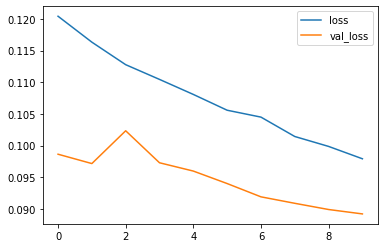

In [367]:
pd.DataFrame(history2.history).plot()

In [325]:
from sklearn.metrics import r2_score 
## r2_score=1-var(prediction_line)/var(mean_line)=1-prediction_mse/mean_mse
## where  R is the correlation between the predicted values and the observed values of Y. 
## Note: R^2 score may be negative (it need not actually be the square of a quantity R)

y_pred=model2.predict(x_t)
r2_score(y_t,y_pred)

0.5380917439772654

### using kfold

In [352]:
from sklearn import datasets
diabetes=datasets.load_diabetes()
X=diabetes.data[:150]
Y=diabetes.target[:150]

In [364]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X=x.to_numpy()#[:10000]
Y=y.to_numpy()#[:10000]
# define base model
def baseline_model():
        layers=[
                Dense(512,activation='relu',input_shape=(8,)),
                Dropout(.2),
                Dense(64,activation='relu'),
                Dropout(.2),
                Dense(1)
                ]
        model=Sequential(layers)
        model.compile(optimizer='Adam',loss='mean_squared_error')
        model.summary()
        return model

estimator = KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=32, verbose=0)
kfold = KFold(n_splits=5)

results = cross_val_score(estimator, X, Y, cv=kfold,)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()),)

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 512)               4608      
_________________________________________________________________
dropout_126 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_192 (Dense)            (None, 64)                32832     
_________________________________________________________________
dropout_127 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 65        
Total params: 37,505
Trainable params: 37,505
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_66"
_________________________________________________________________
Layer (type)              

In [369]:
# r2 score
1-0.18/y_t.var()

0.06798268993183643